In [1]:
PATH_GENRE = "/kaggle/input/dataset-of-songs-in-spotify/genres_v2.csv"

SELECTED_GENRES = ['rap', 'techno']
SELECTED_FEATURES = ['duartion_minutes', 'speechiness']
TARGET = 'genre'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import plotnine
from plotnine import *
import matplotlib.pyplot as plt
from sklearn import tree

plotnine.options.figure_size = (6, 4)
from plotnine import *

## Read data and preprocess 

In [3]:
# Read data
df = pd.read_csv(PATH_GENRE, low_memory=False)

In [4]:
# Modify features 
df['genre'] = df['genre'].str.title()
df['duartion_minutes'] = df['duration_ms'] / 60000 

In [5]:
# Filter Genres
df = df[df.genre.str.lower().isin(SELECTED_GENRES)].copy()

## Generate density plots

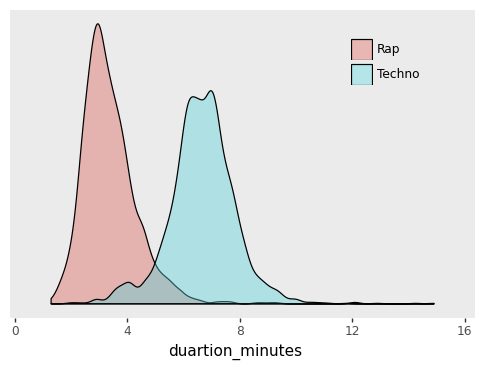

<ggplot: (8733352038789)>


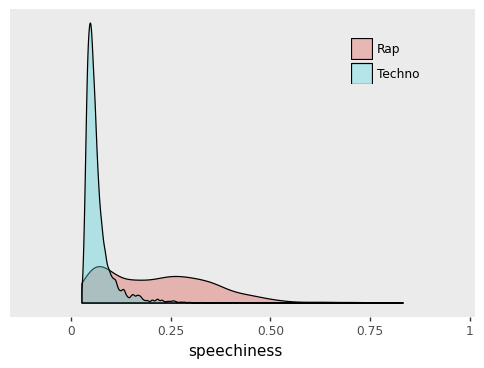

<ggplot: (8733352047121)>


In [6]:
for feature in SELECTED_FEATURES:
    print(ggplot(df, aes(feature, fill=TARGET)) + 
          geom_density(alpha=0.4) + 
          scale_x_continuous(expand=(0.1, 0.1)) +
          theme(legend_title=element_blank(),
                legend_position=(0.75,0.75),
                legend_background=element_blank(),
                panel_grid=element_blank(), 
                axis_text_y=element_blank(), 
                axis_title_y=element_blank(),
                axis_ticks_major_y=element_blank()))

## Train decision tree 

In [7]:
# Train tree
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree.fit(df[SELECTED_FEATURES], df[TARGET])

DecisionTreeClassifier(max_depth=2)

[Text(697.5, 906.0, 'duartion_minutes <= 4.895\ngini = 0.473\nsamples = 4804\nvalue = [1848, 2956]\nclass = Techno'),
 Text(348.75, 543.6, 'speechiness <= 0.074\ngini = 0.17\nsamples = 1907\nvalue = [1728, 179]\nclass = Rap'),
 Text(174.375, 181.19999999999993, 'gini = 0.439\nsamples = 449\nvalue = [303, 146]\nclass = Rap'),
 Text(523.125, 181.19999999999993, 'gini = 0.044\nsamples = 1458\nvalue = [1425, 33]\nclass = Rap'),
 Text(1046.25, 543.6, 'speechiness <= 0.229\ngini = 0.079\nsamples = 2897\nvalue = [120, 2777]\nclass = Techno'),
 Text(871.875, 181.19999999999993, 'gini = 0.041\nsamples = 2814\nvalue = [59, 2755]\nclass = Techno'),
 Text(1220.625, 181.19999999999993, 'gini = 0.39\nsamples = 83\nvalue = [61, 22]\nclass = Rap')]

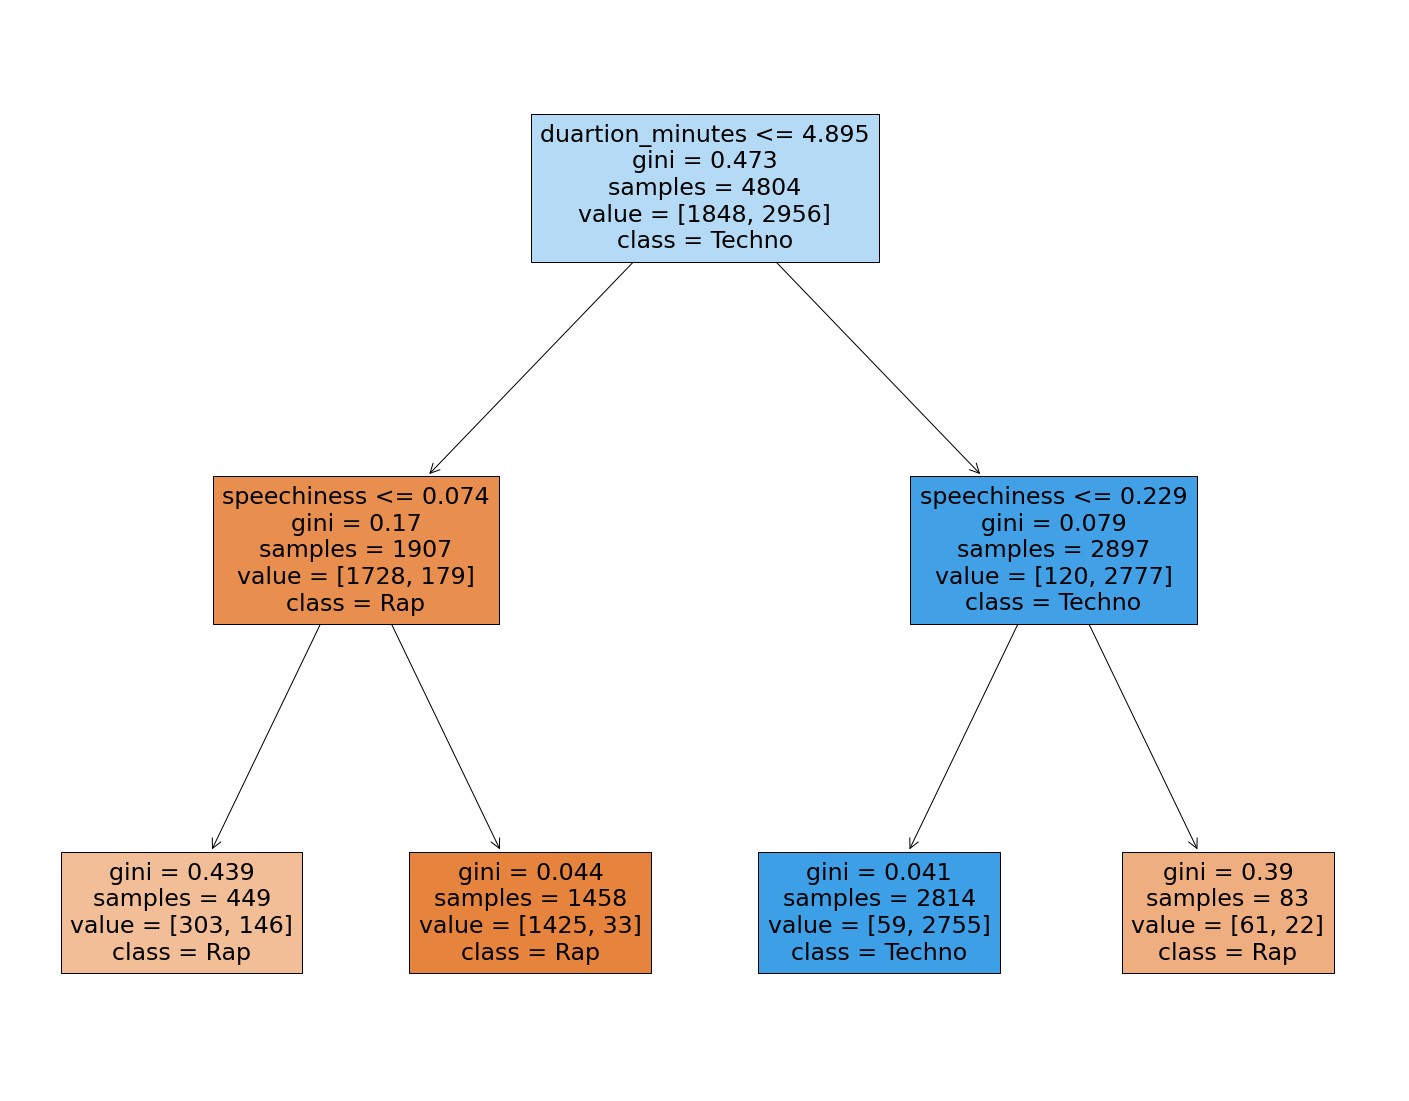

In [8]:
# Plot tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree, 
               feature_names=SELECTED_FEATURES,  
               class_names=list(df[TARGET].unique()),
               filled=True) 